<a href="https://colab.research.google.com/github/NancyBudgujjar/Predective-Maintenance-IITD_FSM/blob/main/IITD_ML_05_FD002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/project/CMaps/train_FD002.txt',sep=" ",header=None)
df_test = pd.read_csv('/content/drive/MyDrive/project/CMaps/test_FD002.txt',sep=" ",header=None)
df_RUL = pd.read_csv('/content/drive/MyDrive/project/CMaps/RUL_FD002.txt',sep=" ",header=None)

In [4]:
df_train # used to see the first five elements of the data.

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,NaN,NaN
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,NaN,NaN
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,NaN,NaN
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,NaN,NaN


In [5]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,NaN,NaN
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,NaN,NaN
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,NaN,NaN
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,NaN,NaN
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065,NaN,NaN
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075,NaN,NaN
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805,NaN,NaN
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589,NaN,NaN


In [6]:
df_RUL

,0,1
0,18,NaN
1,79,NaN
2,106,NaN
3,110,NaN
4,15,NaN
...,...,...
254,122,NaN
255,191,NaN
256,56,NaN
257,131,NaN


In [7]:
df_train.drop(columns=[26, 27], inplace=True)
df_test.drop(columns=[26, 27], inplace=True)
df_RUL.drop(columns=[1],inplace=True)

In [8]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio) (P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

col_names = index_names + setting_names + sensor_names

The dataset FD001 contains time series of 21 sensors and 3 settings of 100 units(turbofan engine).Each engine works normally at the beginning of each time series and fails at the end of the time series. Each row is a snapshot of the data taken during a single operation cycle.

In [9]:
df_train.columns = col_names
df_train

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [10]:
df_train.shape

(53759, 26)

In [11]:
df_train.head() # first 5 rows of the F2 training dataset

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [12]:
df_train.describe().T  # used to generating descriptive statistics (transposed view)

,count,mean,std,min,25%,50%,75%,max
engine,53759.0,131.082981,74.463862,1.0000,68.0000,131.0000,195.0000,260.0000
cycle,53759.0,109.154746,69.180569,1.0000,52.0000,104.0000,157.0000,378.0000
setting_1,53759.0,23.998407,14.747376,0.0000,10.0046,25.0013,41.9980,42.0080
setting_2,53759.0,0.572056,0.310016,0.0000,0.2507,0.7000,0.8400,0.8420
setting_3,53759.0,94.046020,14.237735,60.0000,100.0000,100.0000,100.0000,100.0000
(Fan inlet temperature) (◦R),53759.0,472.910207,26.389707,445.0000,445.0000,462.5400,491.1900,518.6700
(LPC outlet temperature) (◦R),53759.0,579.672399,37.289399,535.5300,549.5700,555.9800,607.3400,644.5200
(HPC outlet temperature) (◦R),53759.0,1419.971013,105.946341,1243.7300,1352.7600,1369.1800,1499.3700,1612.8800
(LPT outlet temperature) (◦R),53759.0,1205.442024,119.123428,1023.7700,1123.6550,1138.8900,1306.8500,1439.2300
(Fan inlet Pressure) (psia),53759.0,8.031986,3.613839,3.9100,3.9100,7.0500,10.5200,14.6200


In [13]:
df_train.info() # used to get concise summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   53759 non-null  int64  
 1   cycle                                    53759 non-null  int64  
 2   setting_1                                53759 non-null  float64
 3   setting_2                                53759 non-null  float64
 4   setting_3                                53759 non-null  float64
 5   (Fan inlet temperature) (◦R)             53759 non-null  float64
 6   (LPC outlet temperature) (◦R)            53759 non-null  float64
 7   (HPC outlet temperature) (◦R)            53759 non-null  float64
 8   (LPT outlet temperature) (◦R)            53759 non-null  float64
 9   (Fan inlet Pressure) (psia)              53759 non-null  float64
 10  (bypass-duct pressure) (psia)            53759

In [14]:
df_train.isnull().sum() # used to get count of null values in dataset

engine                                     0
cycle                                      0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio) (P50/P2)           0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

In [15]:
df_train.nunique() # used to get count of unique values in dataset

engine                                       260
cycle                                        378
setting_1                                    536
setting_2                                    105
setting_3                                      2
(Fan inlet temperature) (◦R)                   6
(LPC outlet temperature) (◦R)               1590
(HPC outlet temperature) (◦R)              12305
(LPT outlet temperature) (◦R)              15411
(Fan inlet Pressure) (psia)                    6
(bypass-duct pressure) (psia)                 14
(HPC outlet pressure) (psia)                2067
(Physical fan speed) (rpm)                   897
(Physical core speed) (rpm)                22434
(Engine pressure ratio) (P50/P2)               9
(HPC outlet Static pressure) (psia)          681
(Ratio of fuel flow to Ps30) (pps/psia)     1672
(Corrected fan speed) (rpm)                  514
(Corrected core speed) (rpm)               14905
(Bypass Ratio)                              8464
(Burner fuel-air rat

In [16]:
df_train.duplicated().sum() #used to check for duplicate values

0

setting_3, (Fan inlet temperature) (◦R), (Fan inlet Pressure) (psia), (Engine pressure ratio) (P50/P2), (Burner fuel-air ratio), (Required fan speed),
(Required fan conversion speed) are the columns which have only 1 unique value, i.e., the column value is constant and we can say it is not changing much. These column does not help in predicting the output.

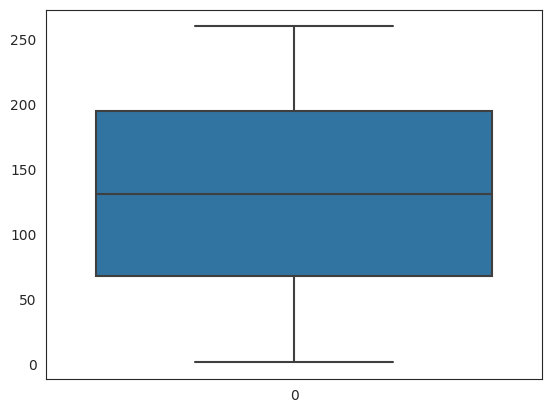

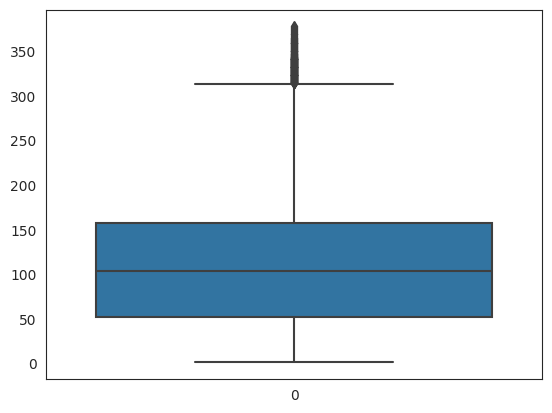

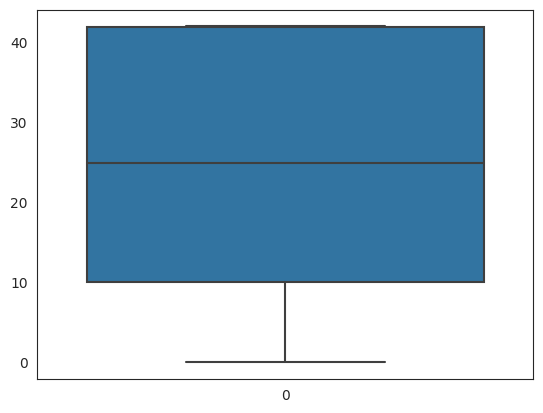

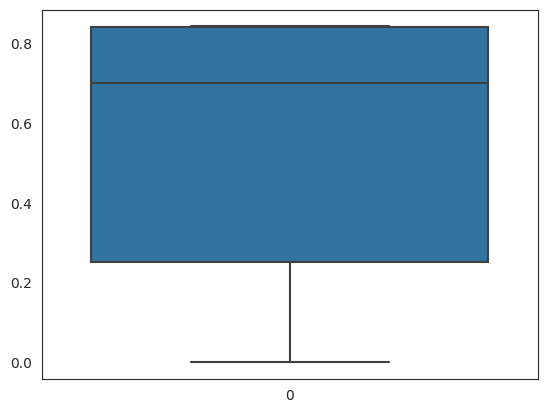

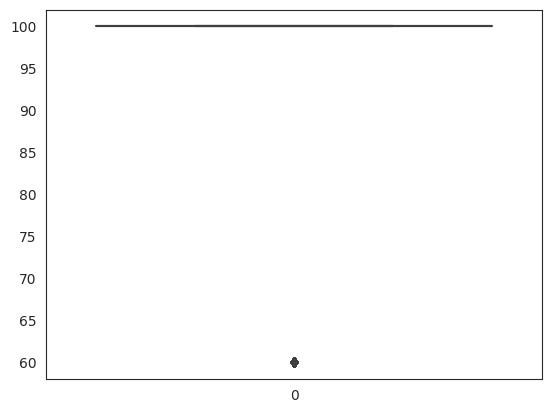

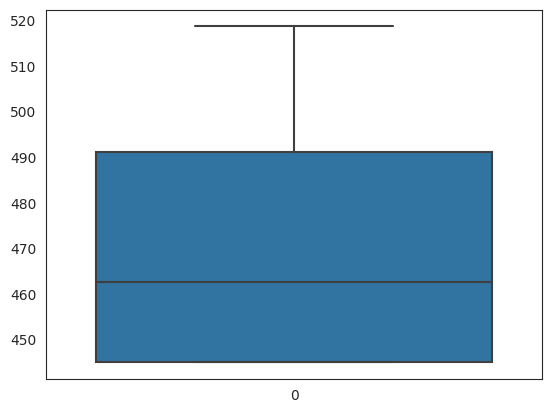

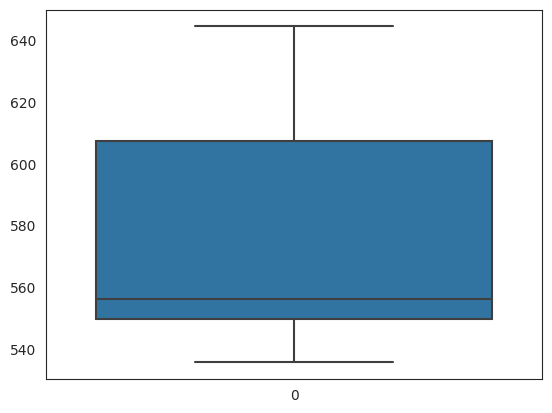

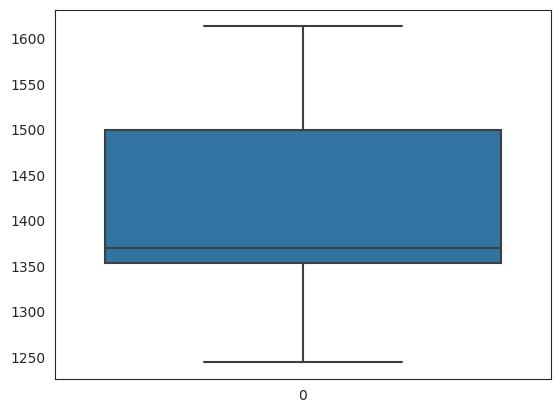

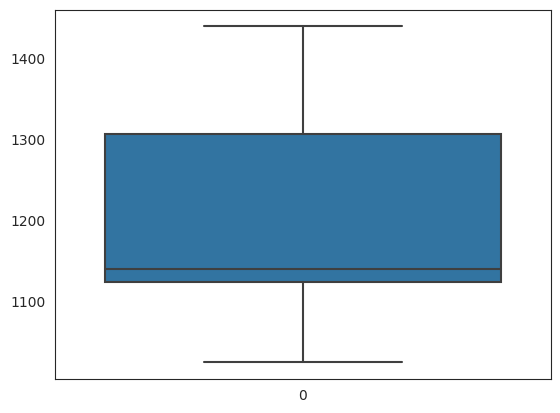

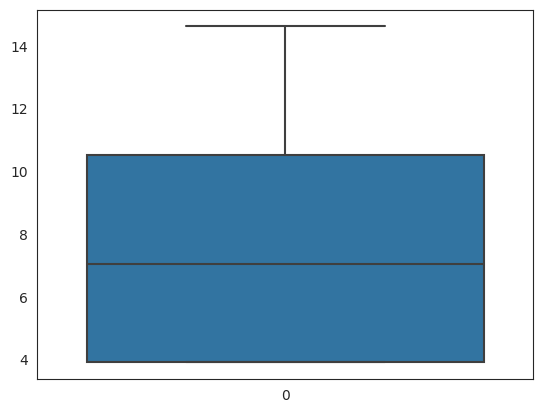

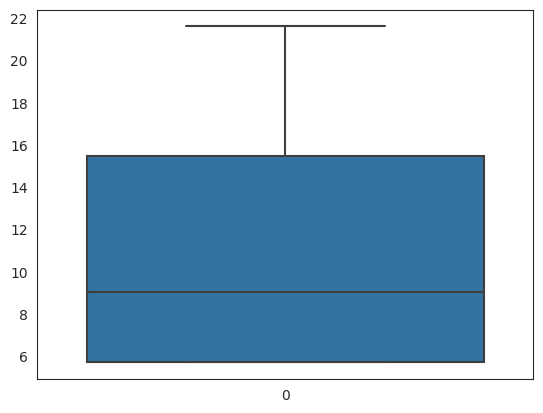

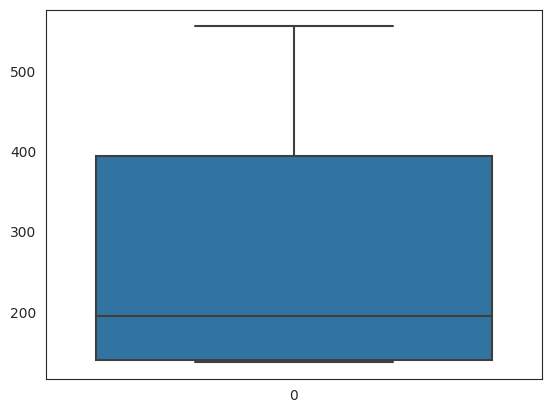

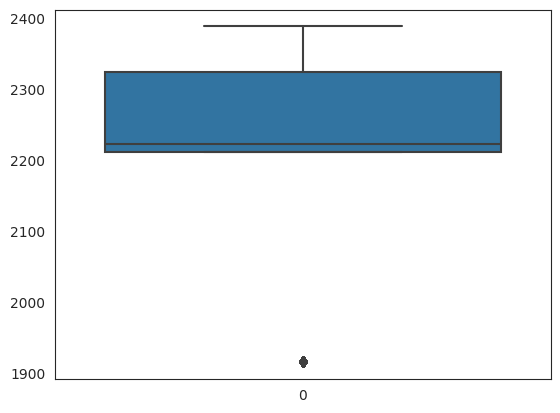

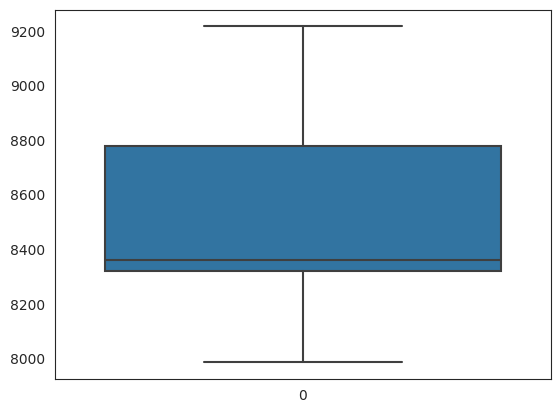

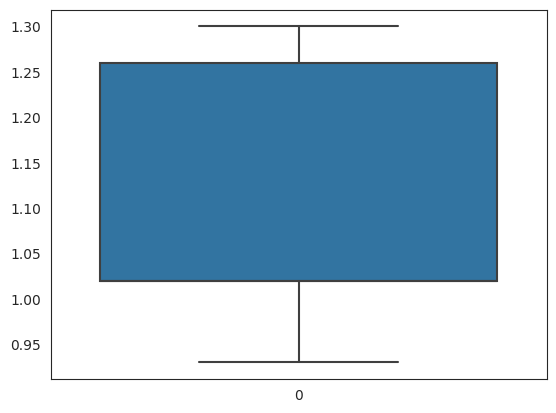

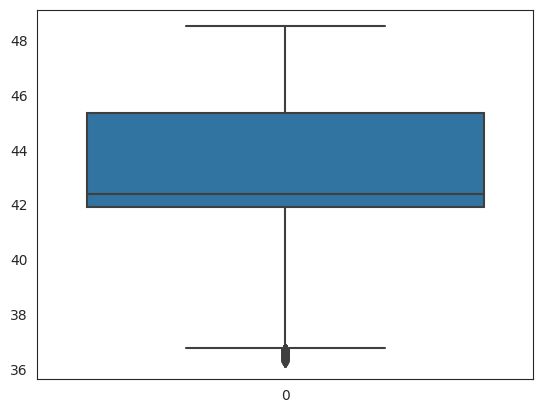

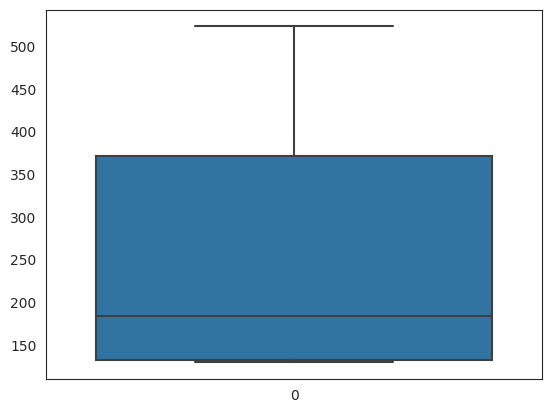

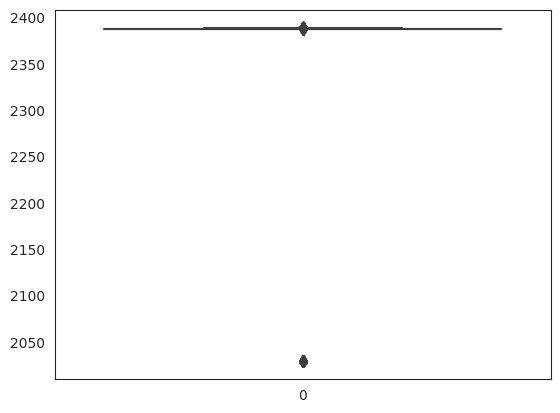

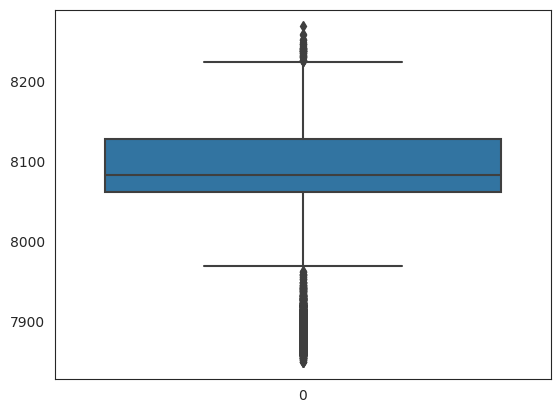

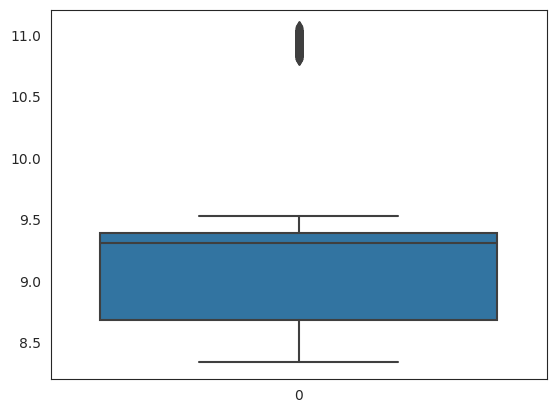

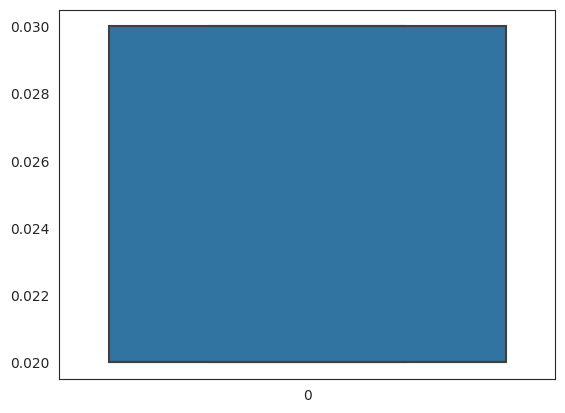

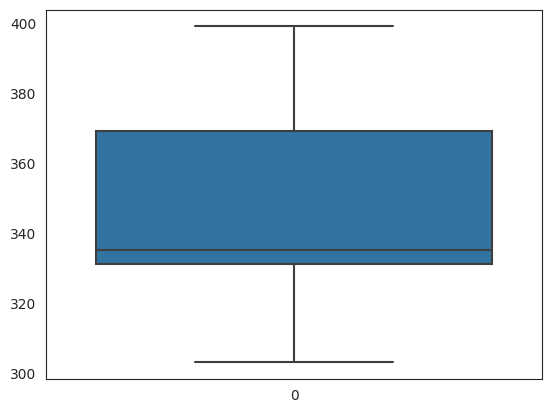

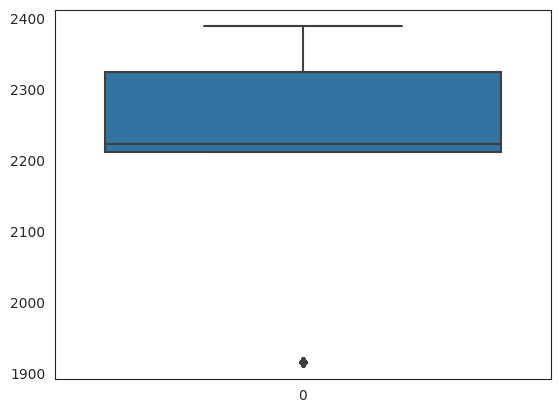

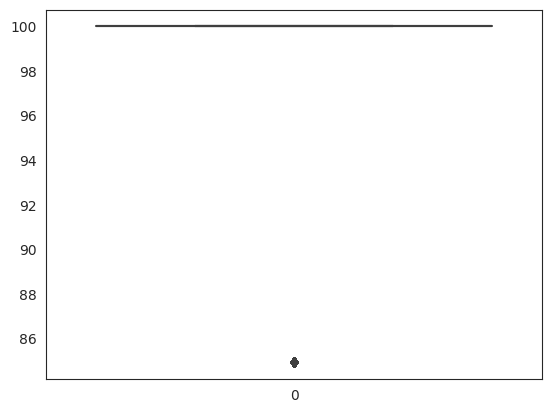

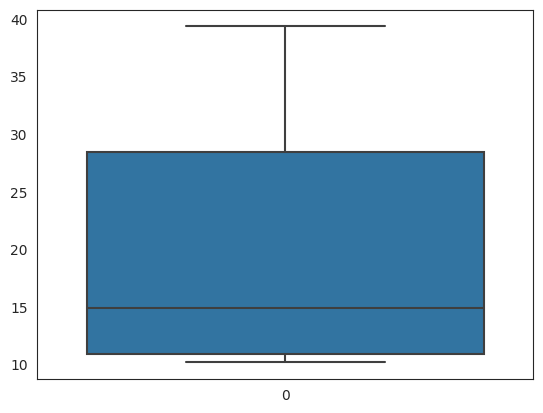

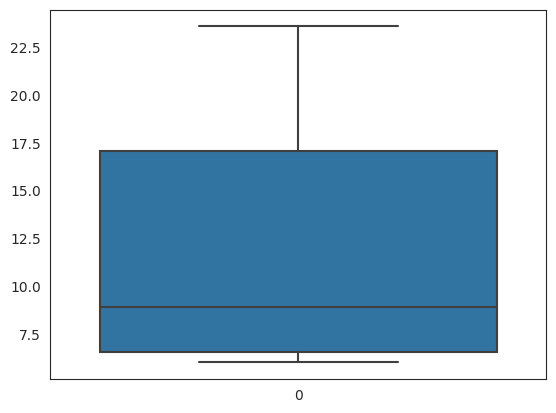

In [17]:
for i in df_train.select_dtypes(include=np.number):
  sns.set_style('white')
  sns.boxplot(df_train[i])
  plt.show()

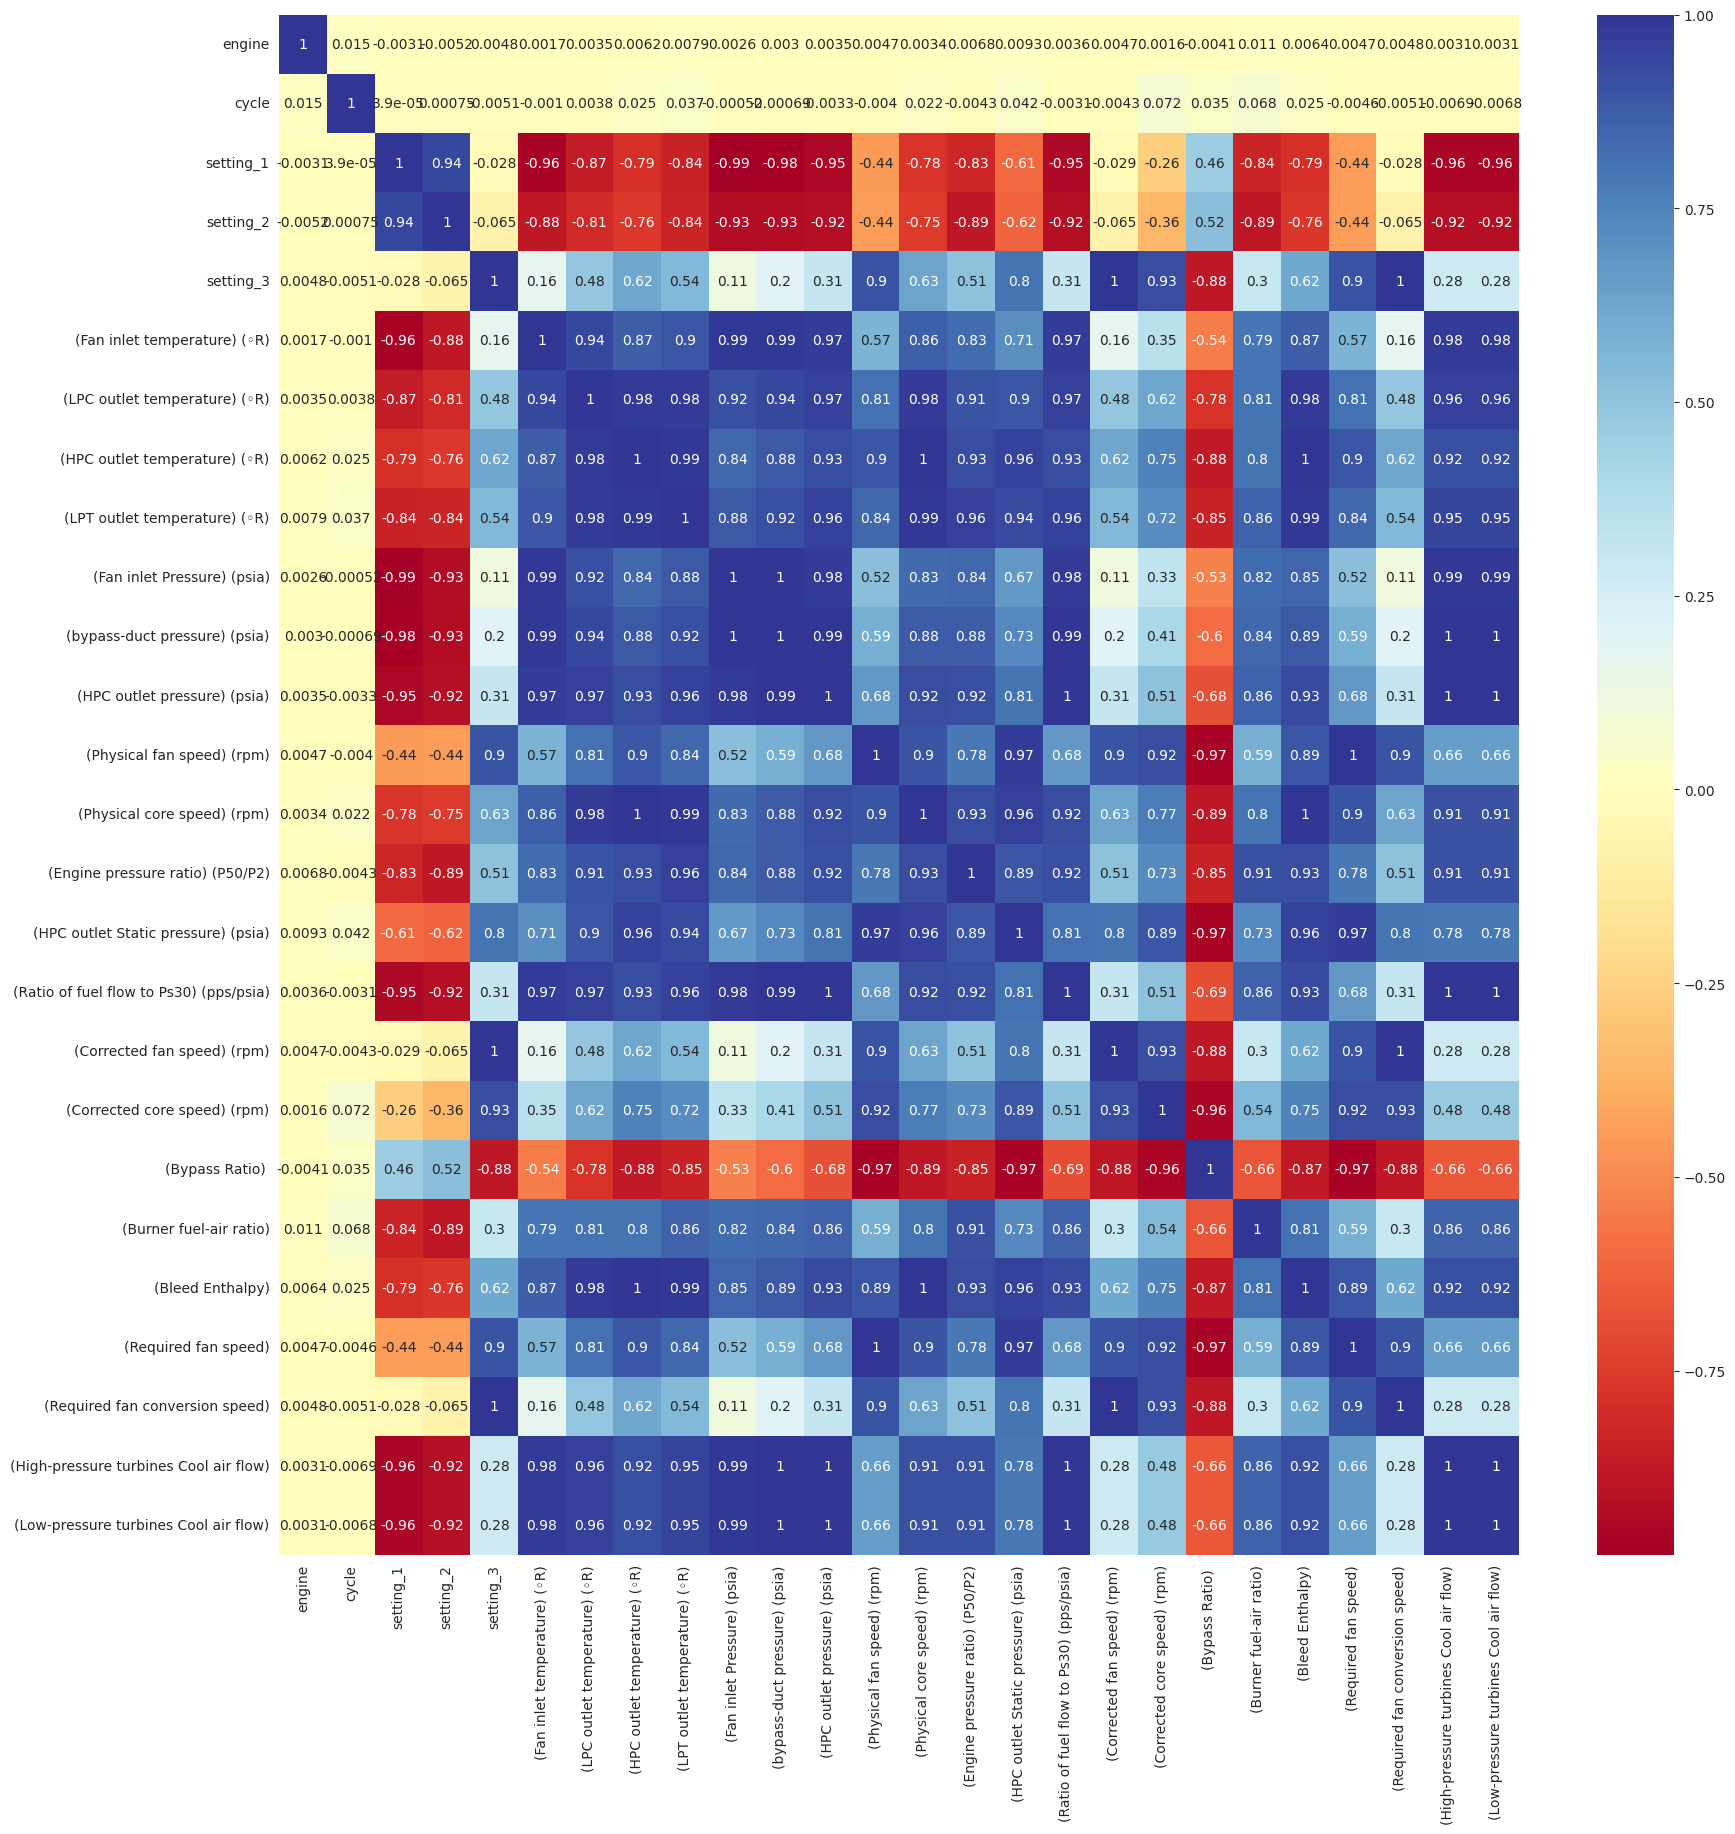

In [18]:
# correlation metrics
plt.figure(figsize=(20,20))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
plot_kws={"s": 1}
sns.heatmap(df_train.corr(), cmap='RdYlBu', annot=True, linecolor='lightgrey').set_facecolor('white')

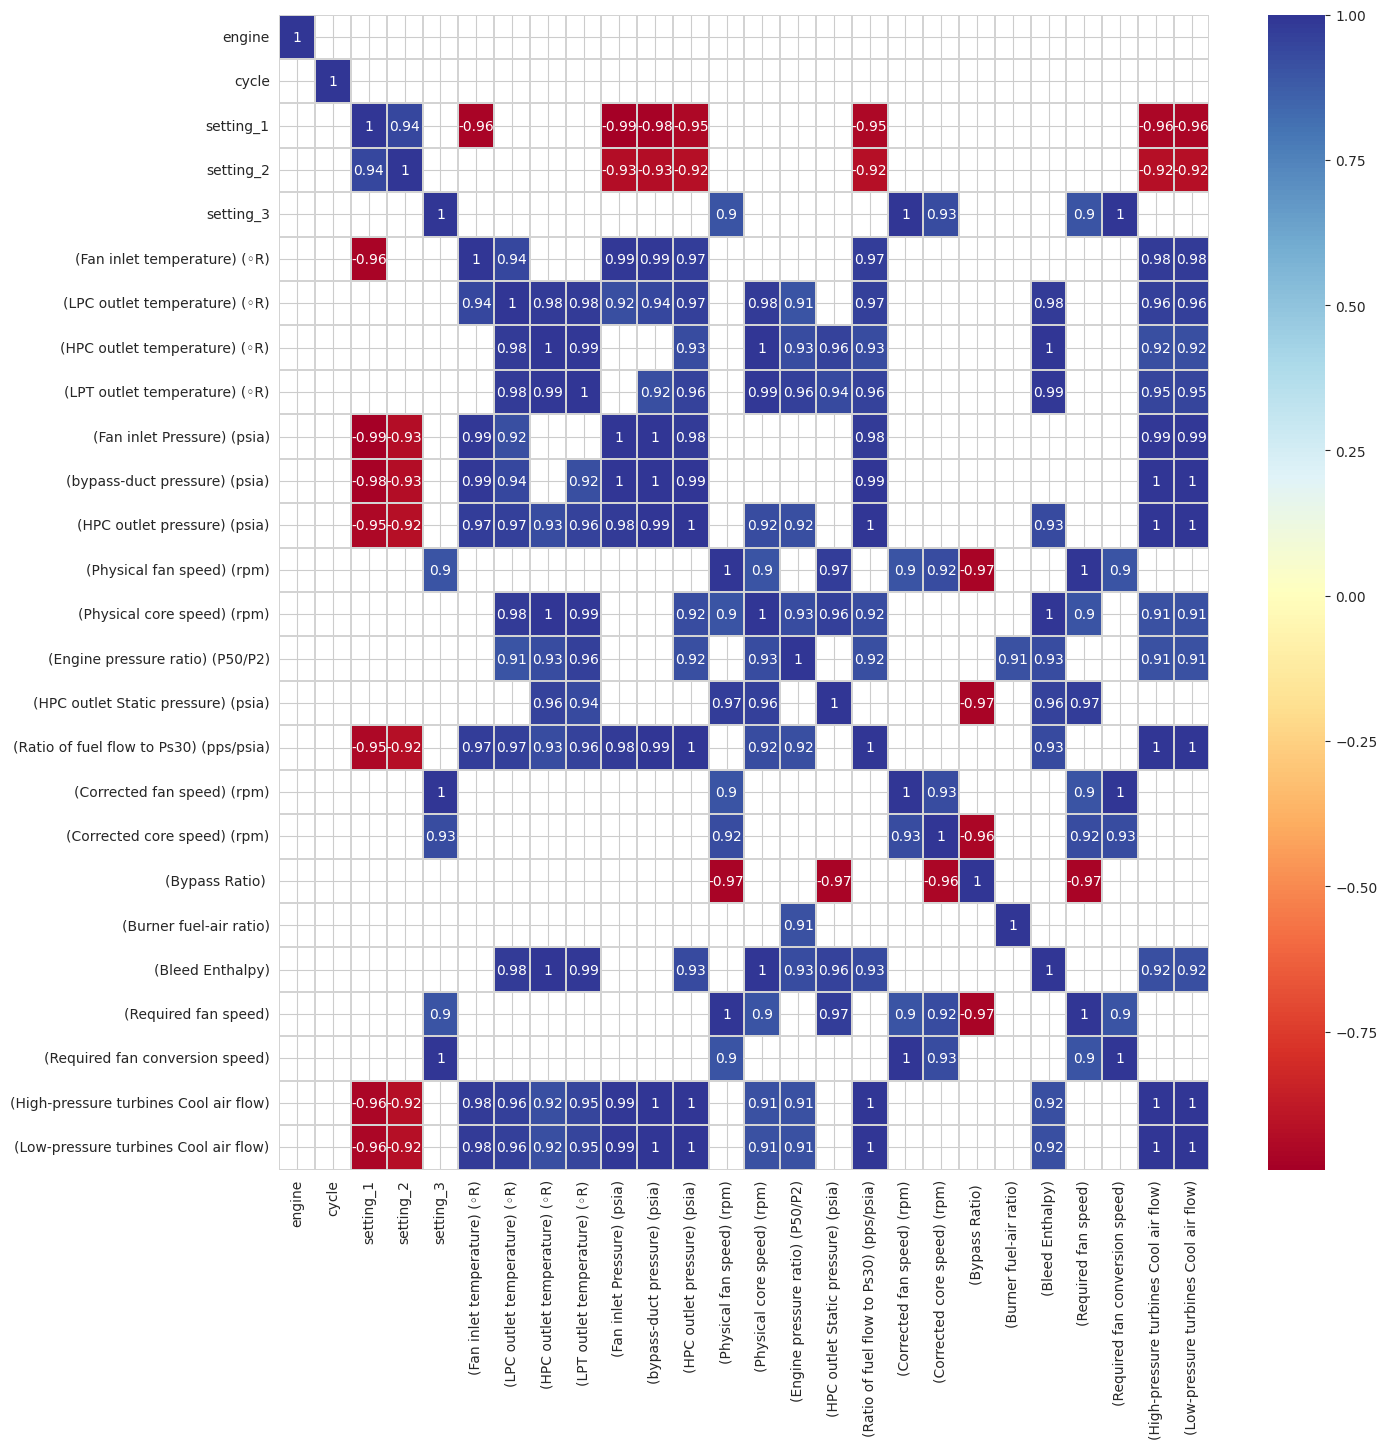

In [19]:
threshold = 0.90 # threshold for co-relation among columns
plt.figure(figsize=(15,15))

sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2, cmap='RdYlBu', annot=True, mask=mask, linewidths=0.2, linecolor='lightgrey').set_facecolor('white')

Drop one of the highly correlated features and keep the other. The threshold for correlation is set at 0.90.

By correlation plot we got to know, among the below mentioned features (which will be dropped) have co-realtion of 0.90 or more.

In [20]:
df_train.drop(['setting_2', '(Fan inlet temperature) (◦R)','(LPC outlet temperature) (◦R)',
               '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)',
               '(Fan inlet Pressure) (psia)', '(bypass-duct pressure) (psia)',
               '(Physical fan speed) (rpm)','(Engine pressure ratio) (P50/P2)',
               '(HPC outlet Static pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)',
               '(Corrected core speed) (rpm)','(Required fan conversion speed)',
               '(Low-pressure turbines Cool air flow)'],axis=1,inplace=True)

In [21]:
df_train.shape

(53759, 12)

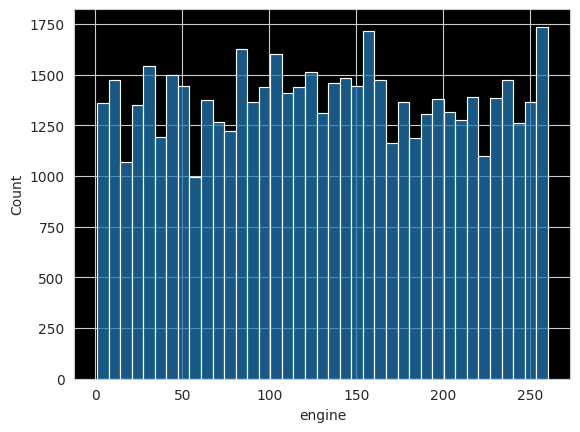

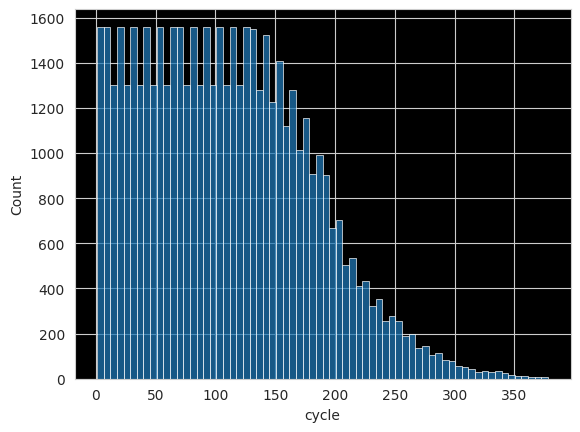

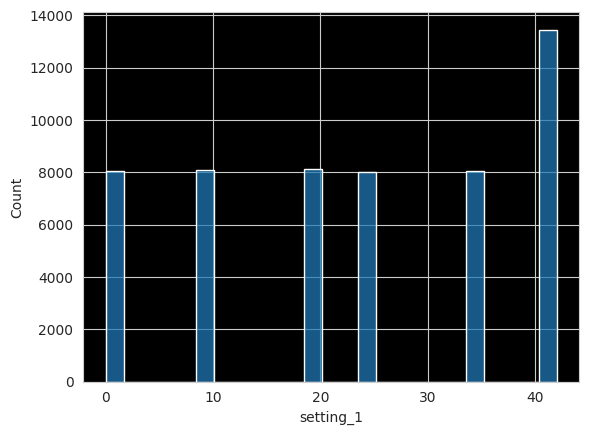

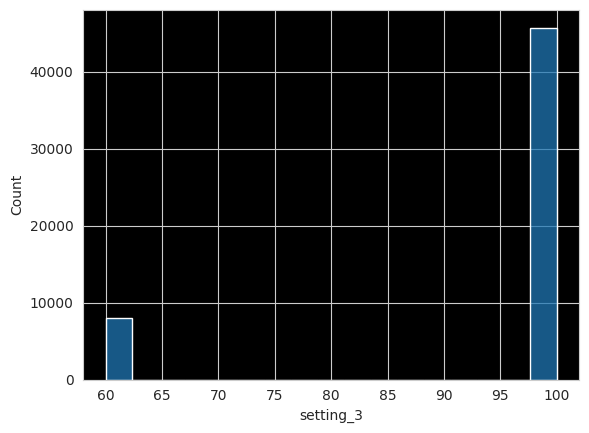

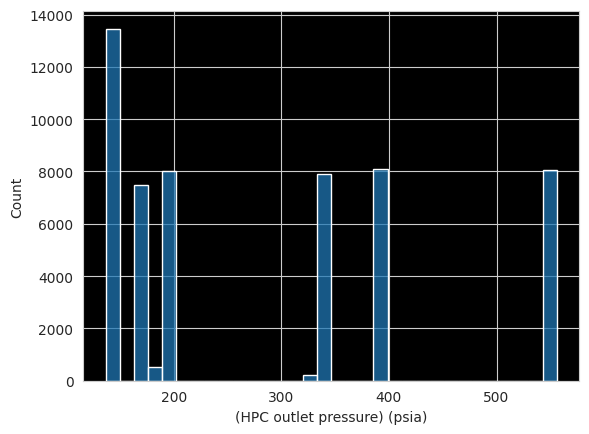

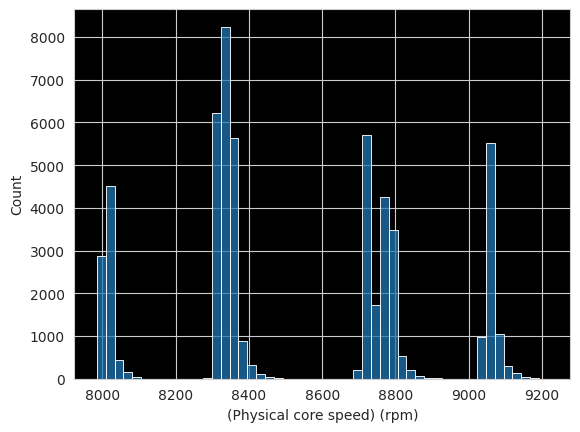

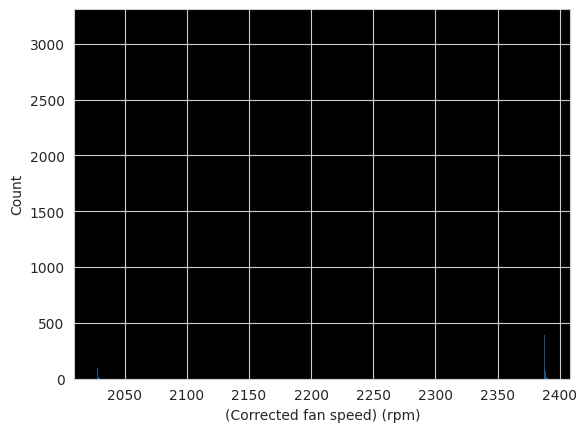

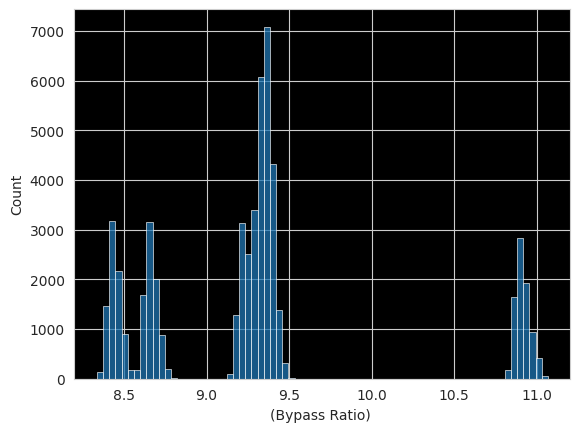

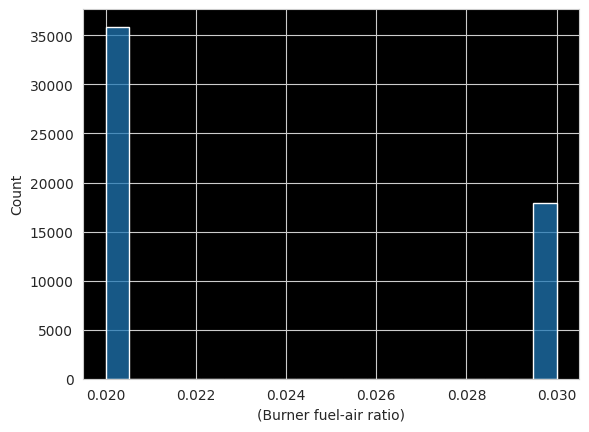

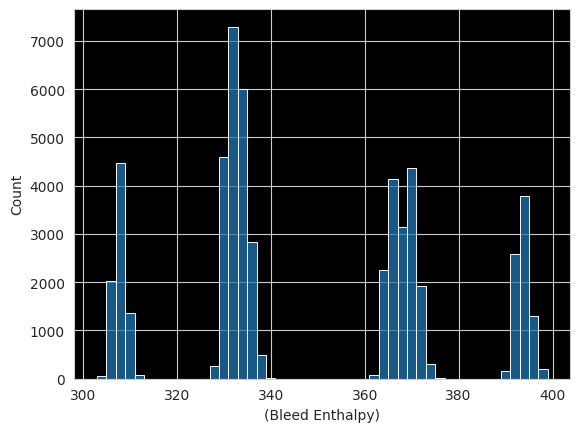

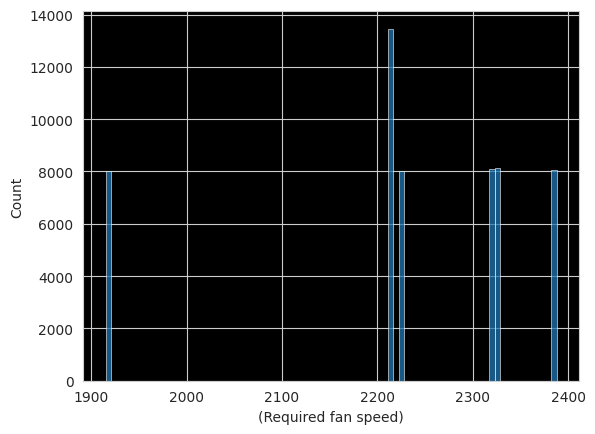

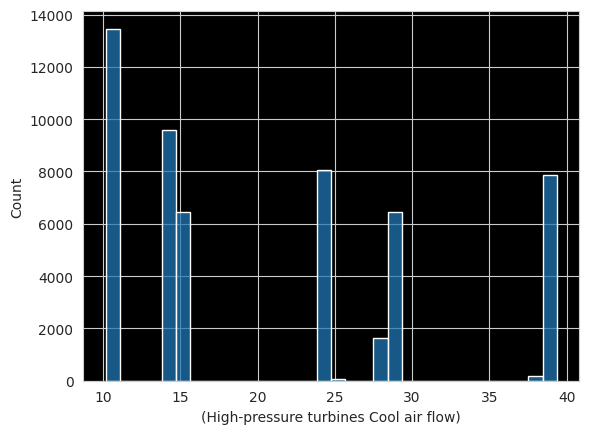

In [22]:
for i in df_train.select_dtypes(include=np.number):
  sns.histplot(df_train[i])
  plt.show()

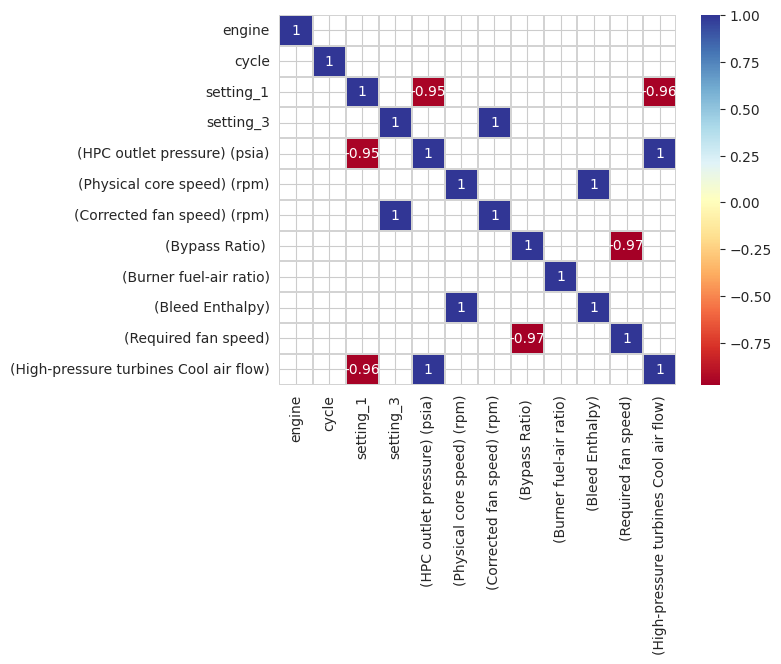

In [23]:
threshold = 0.95 # threshold for co-relation among columns
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2, cmap='RdYlBu', annot=True, mask=mask, linewidths=0.2, linecolor='lightgrey').set_facecolor('white')

In [24]:
df_train['cycle'].max()   # define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life

data_train_RUL = df_train.groupby(['engine']).agg({'cycle':'max'})
data_train_RUL.rename(columns={'cycle':'life'},inplace=True)
data_train_RUL

,life
engine,
1,149
2,269
3,206
4,235
5,154
...,...
256,163
257,309
258,143


In [25]:
df_train = df_train.merge(data_train_RUL, how='left', on = ['engine'])

In [26]:
df_train.head()

,engine,cycle,setting_1,setting_3,(HPC outlet pressure) (psia),(Physical core speed) (rpm),(Corrected fan speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(High-pressure turbines Cool air flow),life
0,1,1,34.9983,100.0,194.64,8341.91,2387.72,9.3461,0.02,334,2223,14.73,149
1,1,2,41.9982,100.0,138.51,8303.96,2387.66,9.3774,0.02,330,2212,10.41,149
2,1,3,24.9988,60.0,175.71,8001.42,2028.03,10.8941,0.02,309,1915,14.08,149
3,1,4,42.0077,100.0,138.46,8303.96,2387.61,9.3528,0.02,329,2212,10.59,149
4,1,5,25.0005,60.0,175.05,7993.23,2028.00,10.8963,0.02,309,1915,14.13,149


In [27]:
df_train['RUL']= df_train['life'] - df_train['cycle']
df_train

,engine,cycle,setting_1,setting_3,(HPC outlet pressure) (psia),(Physical core speed) (rpm),(Corrected fan speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(High-pressure turbines Cool air flow),life,RUL
0,1,1,34.9983,100.0,194.64,8341.91,2387.72,9.3461,0.02,334,2223,14.73,149,148
1,1,2,41.9982,100.0,138.51,8303.96,2387.66,9.3774,0.02,330,2212,10.41,149,147
2,1,3,24.9988,60.0,175.71,8001.42,2028.03,10.8941,0.02,309,1915,14.08,149,146
3,1,4,42.0077,100.0,138.46,8303.96,2387.61,9.3528,0.02,329,2212,10.59,149,145
4,1,5,25.0005,60.0,175.05,7993.23,2028.00,10.8963,0.02,309,1915,14.13,149,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,100.0,334.00,8852.27,2389.02,9.3035,0.03,369,2324,24.36,316,4
53755,260,313,10.0022,100.0,392.46,8915.86,2388.42,8.7586,0.03,374,2319,28.10,316,3
53756,260,314,25.0041,60.0,175.11,8114.33,2030.33,11.0657,0.02,310,1915,14.19,316,2
53757,260,315,25.0033,60.0,174.81,8112.63,2030.35,11.0537,0.02,311,1915,14.05,316,1


#Problem Formulation
The challange of this competetion was to predict the Remaining Useful Life of the engine by using the given sensor's data and operational conditions. But, we will try to simplify that by converting it to a Classification Problem, where the class labels will be of 3 types, i.e. Good Condition, Moderate Condition and Warning Condition.

Labels corresponding to each conditions:


1.   Good Condition - 0

2.   Moderate Condition - 1
3.   Warning Condition - 2

Defining the labels:
we will define the engine's condition with Life Ratio (LR), which is the ratio between Current Cycle and the End cycle(end_of_life). If LR=0, that means the component has just started its degradation and LR=1 means, it is completely degraded.

if LR <= 0.6 - Good Condition

if 0.6 < LR <= 0.8 - Moderate Condition

if 0.8 < LR - Warning Condition

In [28]:
df_train["LR"] = df_train["cycle"].div(df_train['life']) #Calculate LR
df_train

,engine,cycle,setting_1,setting_3,(HPC outlet pressure) (psia),(Physical core speed) (rpm),(Corrected fan speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(High-pressure turbines Cool air flow),life,RUL,LR
0,1,1,34.9983,100.0,194.64,8341.91,2387.72,9.3461,0.02,334,2223,14.73,149,148,0.006711
1,1,2,41.9982,100.0,138.51,8303.96,2387.66,9.3774,0.02,330,2212,10.41,149,147,0.013423
2,1,3,24.9988,60.0,175.71,8001.42,2028.03,10.8941,0.02,309,1915,14.08,149,146,0.020134
3,1,4,42.0077,100.0,138.46,8303.96,2387.61,9.3528,0.02,329,2212,10.59,149,145,0.026846
4,1,5,25.0005,60.0,175.05,7993.23,2028.00,10.8963,0.02,309,1915,14.13,149,144,0.033557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,100.0,334.00,8852.27,2389.02,9.3035,0.03,369,2324,24.36,316,4,0.987342
53755,260,313,10.0022,100.0,392.46,8915.86,2388.42,8.7586,0.03,374,2319,28.10,316,3,0.990506
53756,260,314,25.0041,60.0,175.11,8114.33,2030.33,11.0657,0.02,310,1915,14.19,316,2,0.993671
53757,260,315,25.0033,60.0,174.81,8112.63,2030.35,11.0537,0.02,311,1915,14.05,316,1,0.996835


In [29]:
df_train= df_train.drop(columns=['engine','life'])

In [30]:
labels=[]
for i in range (0,len(df_train)):
  if np.array(df_train["LR"])[i] <= 0.6:
    labels.append(0)
  elif np.array(df_train["LR"])[i] <= 0.8 :
    labels.append(1)
  else :
    labels.append(2)

df_train["labels"]=labels
df_train  = df_train.drop(columns=['LR'])
df_train

,cycle,setting_1,setting_3,(HPC outlet pressure) (psia),(Physical core speed) (rpm),(Corrected fan speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(High-pressure turbines Cool air flow),RUL,labels
0,1,34.9983,100.0,194.64,8341.91,2387.72,9.3461,0.02,334,2223,14.73,148,0
1,2,41.9982,100.0,138.51,8303.96,2387.66,9.3774,0.02,330,2212,10.41,147,0
2,3,24.9988,60.0,175.71,8001.42,2028.03,10.8941,0.02,309,1915,14.08,146,0
3,4,42.0077,100.0,138.46,8303.96,2387.61,9.3528,0.02,329,2212,10.59,145,0
4,5,25.0005,60.0,175.05,7993.23,2028.00,10.8963,0.02,309,1915,14.13,144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,312,20.0037,100.0,334.00,8852.27,2389.02,9.3035,0.03,369,2324,24.36,4,2
53755,313,10.0022,100.0,392.46,8915.86,2388.42,8.7586,0.03,374,2319,28.10,3,2
53756,314,25.0041,60.0,175.11,8114.33,2030.33,11.0657,0.02,310,1915,14.19,2,2
53757,315,25.0033,60.0,174.81,8112.63,2030.35,11.0537,0.02,311,1915,14.05,1,2


In [31]:
Y = df_train["labels"].values
X = df_train.drop(labels = ["labels"], axis=1)

from keras.utils import normalize
X = normalize(X, axis=1)

MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian. For example, in image processing, pixel values are typically in the range of 0-255. Scaling these values using MinMaxScaler ensures that the values are within a fixed range and contributes equally to the analysis.

In [32]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (43007, 12)
x_test shape :  (10752, 12)
y_train shape :  (43007,)
y_test shape :  (10752,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn import metrics

models= [
         ('Logestic Regression',LogisticRegression(max_iter=900)),
         ('SVM',SVC(kernel='linear')),
         ('Random Forest Classifier',RandomForestClassifier()),
         ('KNeighbors Classifier',KNeighborsClassifier()),
         ('Decision Tree', DecisionTreeClassifier()),
         ('AdaBoost Classifier',AdaBoostClassifier()),
         ('XGB Classifier',XGBClassifier()),
         ('LightGBM Classifier',LGBMClassifier()),
         ('GaussianNB',GaussianNB())]

ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)

    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)

    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

                  ModelName  Train_Acc  Test_Acc
0       Logestic Regression   0.991467  0.991071
1                       SVM   0.995629  0.996001
2  Random Forest Classifier   1.000000  0.994048
3     KNeighbors Classifier   0.992513  0.985677
4             Decision Tree   1.000000  0.995908
5       AdaBoost Classifier   0.949357  0.951079
6            XGB Classifier   1.000000  0.997024
7       LightGBM Classifier   1.000000  0.997024
8                GaussianNB   0.950682  0.955636


In [35]:
df_train['labels'].value_counts()

0    32147
2    10854
1    10758
Name: labels, dtype: int64

#Handling Imbalance dataset

In [36]:
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0 1 2] [32147 10758 10854]
After SMOTE:  [0 1 2] [32147 32147 32147]


LOGISTIC REGRESSION


In [37]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smote, y_train_smote)
LR_prediction_smote = model_LR.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, LR_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, LR_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, LR_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy: 0.8944476126289596

Count of predicted label: [0 1 2] [6065 5223 8001]

Confusion Metrics: 
 [[6062  355    0]
 [   3 4843 1653]
 [   0   25 6348]]

Precision Values for:  0.9070627719512303
Recall Values for:  0.8944476126289596
F-Measure Values for:  0.9007110231734224


RANDOM FOREST

In [38]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))
print()

(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, RF_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, RF_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.996163616569029

Count of predicted labels:  [0 1 2] [6369 6545 6375]

Confusion Metrics after SMOTE: 
 [[6365   52    0]
 [   4 6485   10]
 [   0    8 6365]]

Precision Values for:  0.9961840783444569
Recall Values for:  0.996163616569029
F-Measure Values for:  0.9961738473516698


KNN

In [39]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smote, y_train_smote)

KNN_prediction_smote = model_KNN.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, KNN_prediction_smote))
print()

(unique, counts) = np.unique(KNN_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, KNN_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, KNN_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, KNN_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9940380527761937

Count of predicted labels:  [0 1 2] [6356 6556 6377]

Confusion Metrics after SMOTE: 
 [[6354   63    0]
 [   2 6470   27]
 [   0   23 6350]]

Precision Values for:  0.9940766993323065
Recall Values for:  0.9940380527761937
F-Measure Values for:  0.9940573756786287


Decision Tree


In [40]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smote, y_train_smote)

DT_prediction_smote = model_DT.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, DT_prediction_smote))
print()

(unique, counts) = np.unique(DT_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, DT_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, DT_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, DT_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9976152211104775

Count of predicted labels:  [0 1 2] [6413 6495 6381]

Confusion Metrics after SMOTE: 
 [[6401   16    0]
 [  12 6474   13]
 [   0    5 6368]]

Precision Values for:  0.9976150075464733
Recall Values for:  0.9976152211104775
F-Measure Values for:  0.997615114328464


ADABOOST

In [41]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smote, y_train_smote)

AdaBoost_prediction_smote = model_AdaBoost.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, AdaBoost_prediction_smote))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, AdaBoost_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, AdaBoost_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, AdaBoost_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9467572191404428

Count of predicted labels:  [0 1 2] [6007 6812 6470]

Confusion Metrics after SMOTE: 
 [[6007  410    0]
 [   0 6142  357]
 [   0  260 6113]]

Precision Values for:  0.9486307024654581
Recall Values for:  0.9467572191404428
F-Measure Values for:  0.9476930348870128


XGBoost

In [42]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smote, y_train_smote)

XGB_prediction_smote = model_XGB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, XGB_prediction_smote))
print()

(unique, counts) = np.unique(XGB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, XGB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, XGB_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, XGB_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9984447094198766

Count of predicted labels:  [0 1 2] [6406 6507 6376]

Confusion Metrics after SMOTE: 
 [[6402   15    0]
 [   4 6488    7]
 [   0    4 6369]]

Precision Values for:  0.9984457351080577
Recall Values for:  0.9984447094198766
F-Measure Values for:  0.9984452222637037


LIGHT GBM

In [43]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smote, y_train_smote)

LGBM_prediction_smote = model_LGBM.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, LGBM_prediction_smote))
print()

(unique, counts) = np.unique(LGBM_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, LGBM_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, LGBM_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, LGBM_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9986002384778889

Count of predicted labels:  [0 1 2] [6402 6516 6371]

Confusion Metrics after SMOTE: 
 [[6400   17    0]
 [   2 6494    3]
 [   0    5 6368]]

Precision Values for:  0.9986029223585041
Recall Values for:  0.9986002384778889
F-Measure Values for:  0.9986015804163932


Gaussian Naive Bayes

In [44]:
model_NB = GaussianNB()
model_NB.fit(X_train_smote, y_train_smote)

NB_prediction_smote = model_NB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, NB_prediction_smote))
print()

(unique, counts) = np.unique(NB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, NB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, NB_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, NB_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9376846907563896

Count of predicted labels:  [0 1 2] [5699 7339 6251]

Confusion Metrics after SMOTE: 
 [[5685  732    0]
 [  14 6318  167]
 [   0  289 6084]]

Precision Values for:  0.9434826829275474
Recall Values for:  0.9376846907563896
F-Measure Values for:  0.9405747517749226


#SMOTE-ENN

In [45]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTEENN: ", unique2, counts2)

X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0 1 2] [32147 10758 10854]
After SMOTEENN:  [0 1 2] [31840 31857 31975]


LOGISTIC REGRESSION


Accuracy: 0.8965246929709956

Count of predicted label: [0 1 2] [5992 5133 8010]

Confusion Metrics: 
 [[5991  288    0]
 [   1 4807 1653]
 [   0   38 6357]]

Precision Values for:  0.9095318930861221
Recall Values for:  0.8965246929709956
F-Measure Values for:  0.9029814541708671


<Axes: >

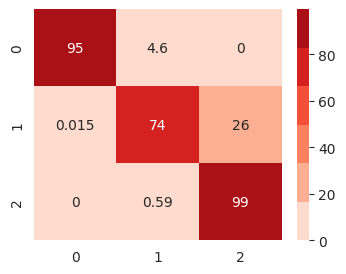

In [46]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteenn, y_train_smoteenn)
LR_prediction_smoteenn = model_LR.predict(X_test_smoteenn)

accuracy = metrics.accuracy_score(y_test_smoteenn, LR_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, LR_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, LR_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

RANDOM FOREST

Accuracy: 0.9986412333420434

Count of predicted label: [0 1 2] [6268 6469 6398]

Confusion Metrics: 
 [[6267   12    0]
 [   1 6452    8]
 [   0    5 6390]]

Precision Values for:  0.9986424363505919
Recall Values for:  0.9986412333420434
F-Measure Values for:  0.9986418348459554


<Axes: >

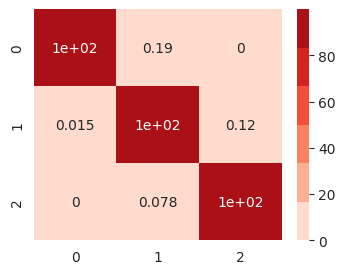

In [47]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteenn, y_train_smoteenn)

RF_prediction_smoteenn = model_RF.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, RF_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(RF_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, RF_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, RF_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

KNN

Accuracy: 0.9988502743663444

Count of predicted label: [0 1 2] [6266 6471 6398]

Confusion Metrics: 
 [[6266   13    0]
 [   0 6455    6]
 [   0    3 6392]]

Precision Values for:  0.9988517135656365
Recall Values for:  0.9988502743663444
F-Measure Values for:  0.9988509939654722


<Axes: >

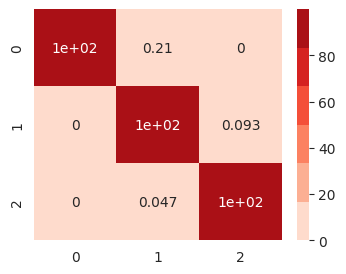

In [48]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteenn, y_train_smoteenn)

KNN_prediction_smoteenn = model_KNN.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, KNN_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(KNN_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, KNN_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, KNN_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, KNN_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, KNN_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Decision Tree


Accuracy: 0.9987980141102691

Count of predicted label: [0 1 2] [6283 6458 6394]

Confusion Metrics: 
 [[6275    4    0]
 [   8 6448    5]
 [   0    6 6389]]

Precision Values for:  0.9987979966409314
Recall Values for:  0.9987980141102691
F-Measure Values for:  0.9987980053756002


<Axes: >

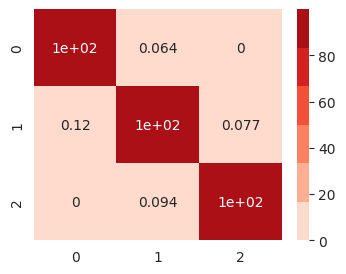

In [49]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteenn, y_train_smoteenn)

DT_prediction_smoteenn = model_DT.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, DT_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(DT_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, DT_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, DT_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, DT_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, DT_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

ADABOOST

Accuracy: 0.8686177162268095

Count of predicted label: [0 1 2] [6047 8951 4137]

Confusion Metrics: 
 [[6042  237    0]
 [   5 6449    7]
 [   0 2265 4130]]

Precision Values for:  0.9047816519879011
Recall Values for:  0.8686177162268095
F-Measure Values for:  0.8863309487076553


<Axes: >

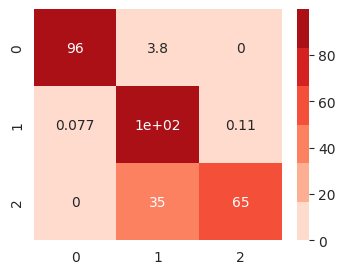

In [50]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteenn, y_train_smoteenn)

AdaBoost_prediction_smoteenn = model_AdaBoost.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, AdaBoost_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, AdaBoost_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, AdaBoost_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, AdaBoost_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, AdaBoost_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

XGBoost

Accuracy: 0.9996864384635484

Count of predicted label: [0 1 2] [6276 6467 6392]

Confusion Metrics: 
 [[6276    3    0]
 [   0 6461    0]
 [   0    3 6392]]

Precision Values for:  0.999686729381937
Recall Values for:  0.9996864384635484
F-Measure Values for:  0.9996865839227216


<Axes: >

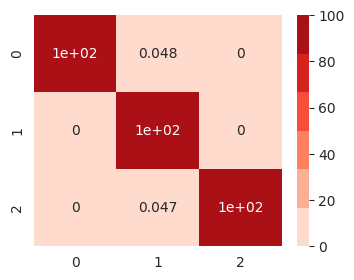

In [51]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteenn, y_train_smoteenn)

XGB_prediction_smoteenn = model_XGB.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, XGB_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(XGB_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, XGB_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, XGB_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, XGB_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, XGB_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

LIGHT GBM

Accuracy: 0.9995296576953228

Count of predicted label: [0 1 2] [6277 6468 6390]

Confusion Metrics: 
 [[6277    2    0]
 [   0 6460    1]
 [   0    6 6389]]

Precision Values for:  0.9995300692728531
Recall Values for:  0.9995296576953228
F-Measure Values for:  0.9995298634840456


<Axes: >

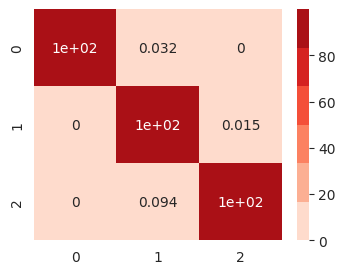

In [52]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteenn, y_train_smoteenn)

LGBM_prediction_smoteenn = model_LGBM.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, LGBM_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LGBM_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, LGBM_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, LGBM_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, LGBM_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, LGBM_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Gaussian Naive Bayes

Accuracy: 0.939482623464855

Count of predicted label: [0 1 2] [5623 7189 6323]

Confusion Metrics: 
 [[5610  669    0]
 [  13 6246  202]
 [   0  274 6121]]

Precision Values for:  0.944273680103662
Recall Values for:  0.939482623464855
F-Measure Values for:  0.9418720591108929


<Axes: >

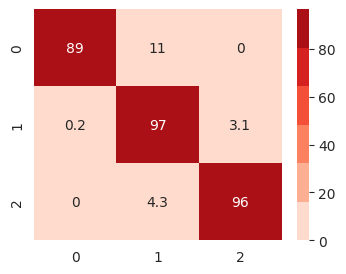

In [53]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteenn, y_train_smoteenn)

NB_prediction_smoteenn = model_NB.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, NB_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(NB_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, NB_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, NB_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, NB_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, NB_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

#SMOTE-Tomek

In [54]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTE-tomek: ", unique2, counts2)

X_train_smoteTomek, X_test_smoteTomek, y_train_smoteTomek, y_test_smoteTomek = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0 1 2] [32147 10758 10854]
After SMOTE-tomek:  [0 1 2] [32136 32131 32142]


Logistic Regression

Accuracy of Logistic Regression after SMOTETomek: 0.8940981226013899

Count of predicted label: [0 1 2] [6041 5263 7978]

Confusion Metrics: 
 [[6035  339    0]
 [   6 4855 1628]
 [   0   69 6350]]

Precision Values for:  0.9056507753359903
Recall Values for:  0.8940981226013899
F-Measure Values for:  0.899837370522536


<Axes: >

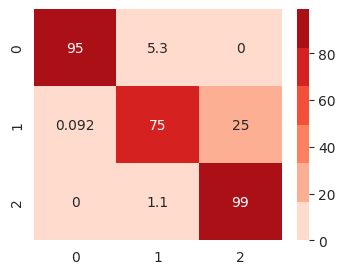

In [55]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteTomek, y_train_smoteTomek)
LR_prediction_smoteTomek = model_LR.predict(X_test_smoteTomek)

accuracy = metrics.accuracy_score(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Accuracy of Logistic Regression after SMOTETomek:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteTomek, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, LR_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, LR_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, LR_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

RANDOM FOREST

Accuracy of Random Forest after SMOTETomek =  0.9970438751166891

Count of predicted labels:  [0 1 2] [6342 6528 6412]

Confusion Metrics after SMOTETomek: 
 [[6340   34    0]
 [   2 6480    7]
 [   0   14 6405]]

Precision Values for:  0.9970578275765317
Recall Values for:  0.9970438751166891
F-Measure Values for:  0.9970508512977987


<Axes: >

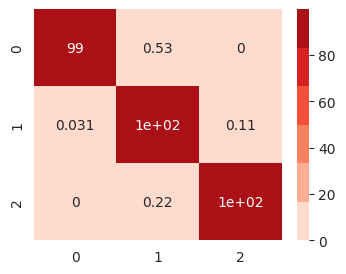

In [56]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteTomek, y_train_smoteTomek)

RF_prediction_smoteTomek = model_RF.predict(X_test_smoteTomek)
print ("Accuracy of Random Forest after SMOTETomek = ", metrics.accuracy_score(y_test_smoteTomek, RF_prediction_smoteTomek))
print()

(unique, counts) = np.unique(RF_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, RF_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, RF_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, RF_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, RF_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

KNN

Accuracy =  0.9956954672751789

Count of predicted labels:  [0 1 2] [6339 6522 6421]

Confusion Metrics after SMOTETomek: 
 [[6337   37    0]
 [   2 6464   23]
 [   0   21 6398]]

Precision Values for:  0.995710485919676
Recall Values for:  0.9956954672751789
F-Measure Values for:  0.9957029765407942


<Axes: >

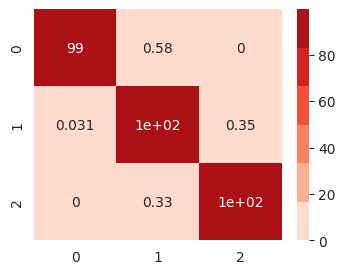

In [57]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteTomek, y_train_smoteTomek)

KNN_prediction_smoteTomek = model_KNN.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, KNN_prediction_smoteTomek))
print()

(unique, counts) = np.unique(KNN_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, KNN_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, KNN_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, KNN_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, KNN_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Decision Tree

Accuracy =  0.9978218027175604

Count of predicted labels:  [0 1 2] [6366 6507 6409]

Confusion Metrics after SMOTETomek: 
 [[6359   15    0]
 [   7 6477    5]
 [   0   15 6404]]

Precision Values for:  0.9978252457883064
Recall Values for:  0.9978218027175604
F-Measure Values for:  0.9978235242499632


<Axes: >

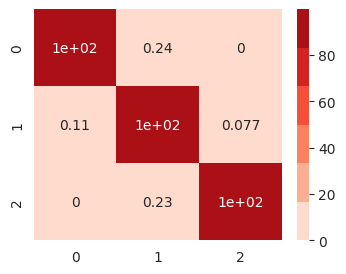

In [58]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteTomek, y_train_smoteTomek)

DT_prediction_smoteTomek = model_DT.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, DT_prediction_smoteTomek))
print()

(unique, counts) = np.unique(DT_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, DT_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, DT_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, DT_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, DT_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

AdaBoost

Accuracy =  0.9357950420080905

Count of predicted labels:  [0 1 2] [5751 6745 6786]

Confusion Metrics after SMOTETomek: 
 [[5751  623    0]
 [   0 5998  491]
 [   0  124 6295]]

Precision Values for:  0.9386425628668063
Recall Values for:  0.9357950420080905
F-Measure Values for:  0.9372166395553605


<Axes: >

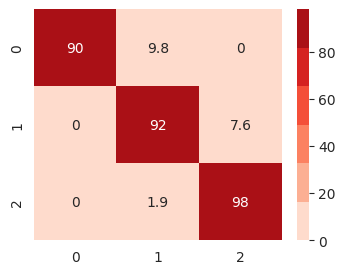

In [59]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteTomek, y_train_smoteTomek)

AdaBoost_prediction_smoteTomek = model_AdaBoost.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, AdaBoost_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

XGBOOST

Accuracy =  0.9984960066383155

Count of predicted labels:  [0 1 2] [6363 6502 6417]

Confusion Metrics after SMOTETomek: 
 [[6358   16    0]
 [   5 6481    3]
 [   0    5 6414]]

Precision Values for:  0.9984976873946178
Recall Values for:  0.9984960066383155
F-Measure Values for:  0.9984968470157594


<Axes: >

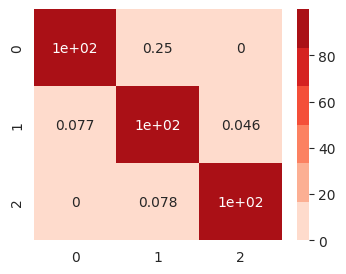

In [60]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteTomek, y_train_smoteTomek)

XGB_prediction_smoteTomek = model_XGB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, XGB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(XGB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, XGB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, XGB_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, XGB_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, XGB_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Light GBM

Accuracy =  0.9983404211181413

Count of predicted labels:  [0 1 2] [6368 6497 6417]

Confusion Metrics after SMOTETomek: 
 [[6361   13    0]
 [   7 6477    5]
 [   0    7 6412]]

Precision Values for:  0.998341275433711
Recall Values for:  0.9983404211181413
F-Measure Values for:  0.9983408482757432


<Axes: >

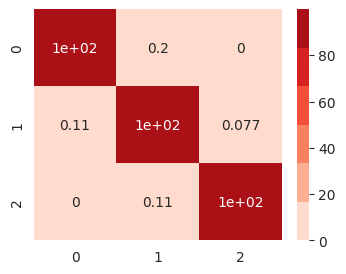

In [61]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteTomek, y_train_smoteTomek)

LGBM_prediction_smoteTomek = model_LGBM.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, LGBM_prediction_smoteTomek))
print()

(unique, counts) = np.unique(LGBM_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, LGBM_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, LGBM_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, LGBM_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, LGBM_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

GAUSSIAN MAIVE BAYES

Accuracy =  0.9370915880095426

Count of predicted labels:  [0 1 2] [5705 7266 6311]

Confusion Metrics after SMOTETomek: 
 [[5688  686    0]
 [  17 6271  201]
 [   0  309 6110]]

Precision Values for:  0.942328000788169
Recall Values for:  0.9370915880095426
F-Measure Values for:  0.9397024995885453


<Axes: >

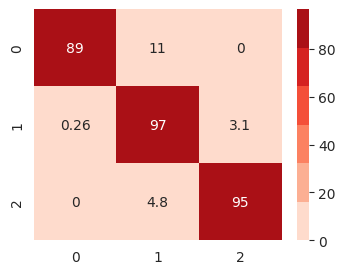

In [62]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteTomek, y_train_smoteTomek)

NB_prediction_smoteTomek = model_NB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, NB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(NB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, NB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, NB_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, NB_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, NB_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

#ANN

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

In [64]:
import tensorflow as tf

In [65]:
ann = tf.keras.models.Sequential()

In [66]:
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
# ann2.add(tf.keras.layers.Dense(units=250, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [67]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [68]:
ann.fit(x_train, y_train ,batch_size = 32, epochs = 10,verbose=2)

Epoch 1/10
1344/1344 - 3s - loss: 0.0563 - 3s/epoch - 2ms/step
Epoch 2/10
1344/1344 - 2s - loss: 0.0303 - 2s/epoch - 1ms/step
Epoch 3/10
1344/1344 - 2s - loss: 0.0206 - 2s/epoch - 1ms/step
Epoch 4/10
1344/1344 - 2s - loss: 0.0169 - 2s/epoch - 2ms/step
Epoch 5/10
1344/1344 - 2s - loss: 0.0149 - 2s/epoch - 2ms/step
Epoch 6/10
1344/1344 - 2s - loss: 0.0156 - 2s/epoch - 1ms/step
Epoch 7/10
1344/1344 - 2s - loss: 0.0140 - 2s/epoch - 1ms/step
Epoch 8/10
1344/1344 - 2s - loss: 0.0135 - 2s/epoch - 1ms/step
Epoch 9/10
1344/1344 - 2s - loss: 0.0122 - 2s/epoch - 1ms/step
Epoch 10/10
1344/1344 - 2s - loss: 0.0126 - 2s/epoch - 2ms/step


In [69]:
ann_pred = ann.predict(x_test)

336/336 [==============================] - 0s 1ms/step


In [70]:
from sklearn.metrics import r2_score,mean_squared_error

In [71]:
mse = mean_squared_error(y_test, ann_pred) # evaluate the performance of the model
rmse = np.sqrt(mse)
r2 = r2_score(y_test,ann_pred)
print(mse)
print(rmse)
print(r2)

0.007175761640695825
0.08470986743405885
0.9888052430383663
